# Homework 2
---
Name: Geczi-Kis Georgian-Marian

Course: DMAP4ILV - Data Mining, Acquisition and Preparation (IMC UAS Krems, SS24)

Deadline: April 8th, 2024

---
### Task Description:
Download the `food dataset` and analyse the data in a executed Jupyter notebook.

Data can be found here: https://www.kaggle.com/datasets/borapajo/food-choices/data

- Which kind of data has each attribute? Show statistical description for each attribute ( mean, median, mode, five-number summary, dispersion of data).
- Show box-plot, histograms, scatter plot for each attribute when possible.
- Calculate correlation for numeric and nominal data for at least 3 pairs of numerical attributes and 3 pairs of nominal attributes?
- Comment the results!!!

In [276]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp

In [277]:
# read the food dataset 
data = pd.read_csv('../Food-dataset/food_coded.csv')

Looking at the `codebook_food.docx`, I observed there are 61 columns with many types of data. I will take firstly a look through the data.

In [278]:
# type(data) # pandas.core.frame.DataFrame, not interesting
pd.set_option('display.max_rows', None)

data.info()
# data has 125 entries/ rows, 61 columns
# types of the columns are float64, int64, object
# GPA is object, should be float64
# some of columns are float64 instead of int64, i don't think it matters

data.head()
# nothing particularly interesting

data.describe()
# Binary data (Gender for example) is not binary, it's 1 and 2
# Multiple data entries are 1/2 instead of 0/1

data.isnull().sum()
# I can't see all the rows. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

GPA                              2
Gender                           0
breakfast                        0
calories_chicken                 0
calories_day                    19
calories_scone                   1
coffee                           0
comfort_food                     1
comfort_food_reasons             2
comfort_food_reasons_coded      19
cook                             3
comfort_food_reasons_coded.1     0
cuisine                         17
diet_current                     1
diet_current_coded               0
drink                            2
eating_changes                   3
eating_changes_coded             0
eating_changes_coded1            0
eating_out                       0
employment                       9
ethnic_food                      0
exercise                        13
father_education                 1
father_profession                3
fav_cuisine                      2
fav_cuisine_coded                0
fav_food                         2
food_childhood      

There are 5 columns that have a lot of missing values
- `calories_day`: 19 (Importance of consuming calories per day)
- `comfort_food_reasons_coded`: 19 (Reasons for consuming first comfort food)
- `cuisine`: 17 (what type of cuisine did you eat growing up?)
- `exercise`: 13 (how often do you exercise in a regular week?)
- `type_sports`: 26 (what type of sports are you involved?)

There needs to be a reason why people didn't answer these questions, they seem somehow correlated.

Also, there is a column that appears 2 times and with ALMOST the same values. 
- `comfort_food_reasons_coded` -> the 10th attribute
- `comfort_food_reasons_coded.1` -> the 12th attribute -> on codebook_food.docx appears we have 60 attributes, but this one makes the data being 61 attributes. 
- the second attribute doesn't have any missing values, suspicious. 

In [279]:
comfort_food = []
comfort_food_1 = []
pd_index = []
for index in data.index:
    if data['comfort_food_reasons_coded'][index] != data['comfort_food_reasons_coded.1'][index]:
        comfort_food.append(data['comfort_food_reasons_coded'][index])
        comfort_food_1.append(data['comfort_food_reasons_coded.1'][index])
        pd_index.append(index)

print(pd.DataFrame({'index': pd_index, 'comfort_food': comfort_food, 'comfort_food_1': comfort_food_1}))

    index  comfort_food  comfort_food_1
0     103           8.0               5
1     106           NaN               1
2     107           NaN               1
3     108           NaN               1
4     109           NaN               1
5     110           NaN               3
6     111           NaN               2
7     112           NaN               3
8     113           NaN               2
9     114           NaN               3
10    115           NaN               1
11    116           NaN               2
12    117           NaN               5
13    118           NaN               1
14    119           NaN               7
15    120           NaN               2
16    121           NaN               3
17    122           NaN               3
18    123           NaN               7
19    124           NaN               5


As it can be observed, `comfort_food_reasons_coded.1` has values for the missing ones from the other attribute, so we will use the second one.

***
For the following part, I will create multiple functions and lists that will deal with the statistical summaries of data's attributes.

The binary attributes: `breakfast`, `coffee`, `drink`, `fries`, `soup`, are symmetrical because both options carry the same value, in my opinion. So, I don't have the need of `binary_asymmetric_list`. I will further have it as `binary_list`. 

`nominal_list`\
`binary_symmetric_list`\
`binary_asymmetric_list`\
    -> both binary lists will be "merged" into one `binary_list`, as there are no asymmetric binary attributes (explained down)\
`numeric_list`\
`ordinal_list`

All the open questions (those for NLP), I added them in a sepparate list, `nlp_list`. I will not work with them.



Note: I wanted to create a function that separes the attributes by using criterias (e.g. binary has 2 unique values), but I couldn't separate correctly nominal and ordinal. So I will make the lists manually. 



In [280]:

nominal_list = ['comfort_food_reasons_coded.1', 'cuisine', 'self_perception_weight',
                'diet_current_coded', 'eating_changes_coded', 'eating_changes_coded1', 'employment', 
                'fav_cuisine_coded', 'fav_food', 'ideal_diet_coded', 'marital_status', 'on_off_campus']
binary_list = ['Gender', 'breakfast', 'coffee', 'drink', 'fries', 'soup', 'sports', 'vitamins']
numeric_list = ['GPA', 'weight']
ordinal_list = ['calories_chicken', 'calories_day', 'calories_scone', 'cook', 'eating_out', 
                'ethnic_food', 'exercise', 'father_education', 'fruit_day', 'grade_level', 
                'greek_food', 'healthy_feeling','income', 'indian_food', 'italian_food', 
                'life_rewarding', 'mother_education', 'nutritional_check', 'parents_cook', 
                'pay_meal_out', 'persian_food', 'thai_food', 'tortilla_calories', 'turkey_calories',
                'veggies_day', 'waffle_calories']

nlp_list = ['comfort_food', 'comfort_food_reasons', 'diet_current', 'mother_profession',
            'eating_changes', 'father_profession', 'fav_cuisine', 'food_childhood', 
            'healthy_meal', 'ideal_diet', 'meals_dinner_friend', 'type_sports']

# nominal_list = [] # I will add the elements by elimination after I complete the rest of them
# data_list = binary_list + numeric_list + ordinal_list + nlp_list
# for column in data.columns:
#     if column not in data_list:
#         nominal_list.append(column)

In [281]:
# The GPA and weight attributes needs some fixing before I can use it. 
# they are object type, should be float64
 
print("Type:", type(data['GPA'][1])) # the data in GPA are strings

print("GPA NaN before:", data['GPA'].isnull().sum()) # 2 missing values, to check later if i lose any values after converting to float
data['GPA'] = pd.to_numeric(data['GPA'], errors='coerce') # 'coerce' will turn the non-numeric values into NaN
print("GPA NaN after:", data['GPA'].isnull().sum()) # 5 missing values, 3 more missing values appeared after converting to float
# I was curious about those 3 missing values, so I checked them manually: 'Personal', '3.79 bitch', 'Unknown'.

print("Weight NaN before:", data['weight'].isnull().sum()) # 2 missing values
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')
print("Weight NaN after:", data['weight'].isnull().sum()) # 5 missing values, the other 3 are: '144 lbs', 'I'm not answering this', 'Not sure, 240'

Type: <class 'str'>
GPA NaN before: 2
GPA NaN after: 5
Weight NaN before: 2
Weight NaN after: 5


In [282]:
# for my personal preference, I will want to have the weight attribute in kilograms

data['weight'] = data['weight'] / 2.20462  # Convert pounds to kilograms
data['weight'] = data['weight'].round(2)

In [283]:
for column in (ordinal_list + nominal_list):
    data[column] = pd.to_numeric(data[column], errors='coerce')
    if data[column].dtype == 'float64':
        data[column] = data[column].astype('Int64')

# I am cleaning a bit the values of the ordinal and nominal data for a better visualisation in the next step. 
# Some of them are float64, some int64, some have decimals (where are not necessary), some don't

In [284]:
# This is a long chunk of code that contains the functions I will use to calculate the statistical summaries of each of the attributes
# I created stats_summary() function so that I can call it when I want to check some attributes
# The functions 'all_<attribute_type> summarise all the attributes of that type, functions created for the purpose of the assignment

def stats_summary(column):
    if column in nominal_list:
        nominal(column)
    if column in binary_list:
        binary(column)
    if column in numeric_list:
        numeric(column)
    if column in ordinal_list:
        ordinal(column)

def nominal(column):
    print(f'### {column} summary - NOMINAL ###')
    counts = data[column].value_counts()
    proportions = data[column].value_counts(normalize=True) * 100
    proportions = proportions.round(1).astype(str) + '%'
    print(pd.DataFrame({'Count': counts, 'Proportion': proportions}))
    print("\n")

def all_nominal():
    for column in nominal_list:
        nominal(column)

def binary(column):
    print(f'### {column} summary - BINARY ###')
    counts = data[column].value_counts()
    proportions = data[column].value_counts(normalize=True) * 100
    proportions = proportions.round(1).astype(str) + '%'
    print(pd.DataFrame({'Count': counts, 'Proportion': proportions}))
    print("\n")

def all_binary():
    for column in binary_list:
        binary(column)

def numeric(column):
    print(f'### {column} summary - NUMERIC ###')
    print("Mean:", data[column].mean().round(2))
    print("Mode:", data[column].mode())
    print("Min: ", data[column].min())
    print("Q1: ", data[column].quantile(0.25))
    print("Median:", data[column].median())
    print("Q3: ", data[column].quantile(0.75))
    print("Max: ", data[column].max())
    print("IQR: ", round(data[column].quantile(0.75) - data[column].quantile(0.25), 2))
    print("Skewness: ", data[column].skew().round(2))
    print("\n")
        
def all_numeric():
    for column in numeric_list:
        numeric(column)

def ordinal(column):
    print(f'### {column} summary - ORDINAL ###')
    counts = data[column].value_counts()
    proportions = data[column].value_counts(normalize=True) * 100
    proportions = proportions.round(1).astype(str) + '%'
    print("Median:", data[column].median())
    print(pd.DataFrame({'Count': counts, 'Proportion': proportions}))
    print("\n")

def all_ordinal():
    for column in ordinal_list:
        ordinal(column)

In [285]:
all_nominal()

### comfort_food_reasons_coded.1 summary - NOMINAL ###
                              Count Proportion
comfort_food_reasons_coded.1                  
2                                53      42.4%
1                                28      22.4%
3                                23      18.4%
5                                 7       5.6%
9                                 5       4.0%
7                                 5       4.0%
4                                 3       2.4%
6                                 1       0.8%


### cuisine summary - NOMINAL ###
         Count Proportion
cuisine                  
1           86      79.6%
2           13      12.0%
3            3       2.8%
4            3       2.8%
6            2       1.9%
5            1       0.9%


### self_perception_weight summary - NOMINAL ###
                        Count Proportion
self_perception_weight                  
3                          45      36.3%
4                          31      25.0%
2               

In [286]:
all_binary()

### Gender summary - BINARY ###
        Count Proportion
Gender                  
1          76      60.8%
2          49      39.2%


### breakfast summary - BINARY ###
           Count Proportion
breakfast                  
1            111      88.8%
2             14      11.2%


### coffee summary - BINARY ###
        Count Proportion
coffee                  
2          94      75.2%
1          31      24.8%


### drink summary - BINARY ###
       Count Proportion
drink                  
2.0       69      56.1%
1.0       54      43.9%


### fries summary - BINARY ###
       Count Proportion
fries                  
1        114      91.2%
2         11       8.8%


### soup summary - BINARY ###
      Count Proportion
soup                  
1.0      97      78.2%
2.0      27      21.8%


### sports summary - BINARY ###
        Count Proportion
sports                  
1.0        75      61.0%
2.0        48      39.0%


### vitamins summary - BINARY ###
          Count Proportion
vitami

In [287]:
all_numeric()

### GPA summary - NUMERIC ###
Mean: 3.42
Mode: 0    3.5
Name: GPA, dtype: float64
Min:  2.2
Q1:  3.2
Median: 3.5
Q3:  3.7
Max:  4.0
IQR:  0.5
Skewness:  -0.75


### weight summary - NUMERIC ###
Mean: 71.89
Mode: 0    61.24
1    63.50
Name: weight, dtype: float64
Min:  45.36
Q1:  61.24
Median: 70.31
Q3:  81.65
Max:  120.2
IQR:  20.41
Skewness:  0.84




In [288]:
all_ordinal()

### calories_chicken summary - ORDINAL ###
Median: 610.0
                  Count Proportion
calories_chicken                  
610                  59      47.2%
720                  32      25.6%
430                  25      20.0%
265                   9       7.2%


### calories_day summary - ORDINAL ###
Median: 3.0
              Count Proportion
calories_day                  
3                63      59.4%
4                23      21.7%
2                20      18.9%


### calories_scone summary - ORDINAL ###
Median: 420.0
                Count Proportion
calories_scone                  
420                79      63.7%
980                23      18.5%
315                22      17.7%


### cook summary - ORDINAL ###
Median: 3.0
      Count Proportion
cook                  
3        49      40.2%
2        34      27.9%
4        18      14.8%
1        13      10.7%
5         8       6.6%


### eating_out summary - ORDINAL ###
Median: 2.0
            Count Proportion
eating_out       

***
This was a general statistical summary for each of the attributes, except the ones that are for NLP.\
Next step is to visualise some of this data.



{'whiskers': [<matplotlib.lines.Line2D at 0x17f83434190>,
 'caps': [<matplotlib.lines.Line2D at 0x17f83e22e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f83436750>],
 'medians': [<matplotlib.lines.Line2D at 0x17f83e216d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17f83e21590>],
 'means': []}

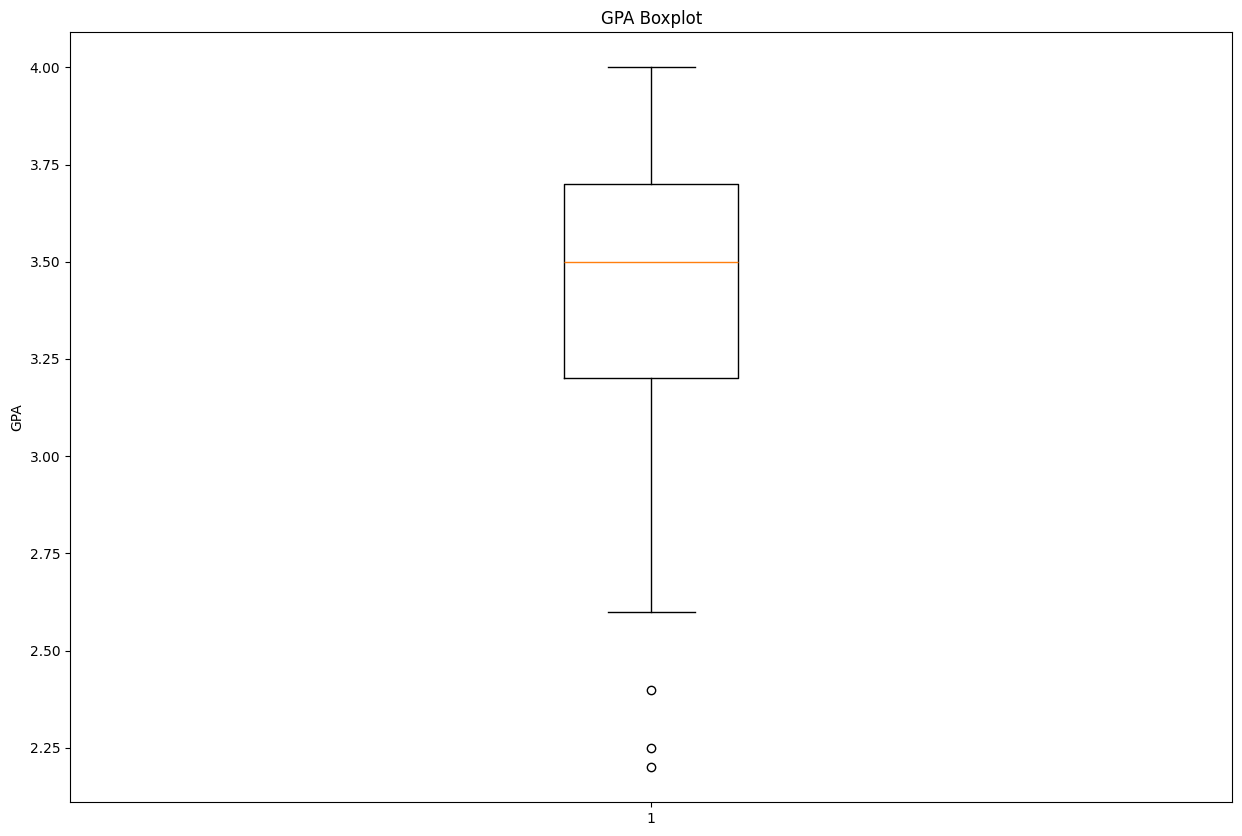

In [289]:
# Numeric - Boxplot - GPA
plt.figure(figsize=(15, 10))
plt.title('GPA Boxplot')
plt.ylabel('GPA')
plt.boxplot(data['GPA'].dropna())

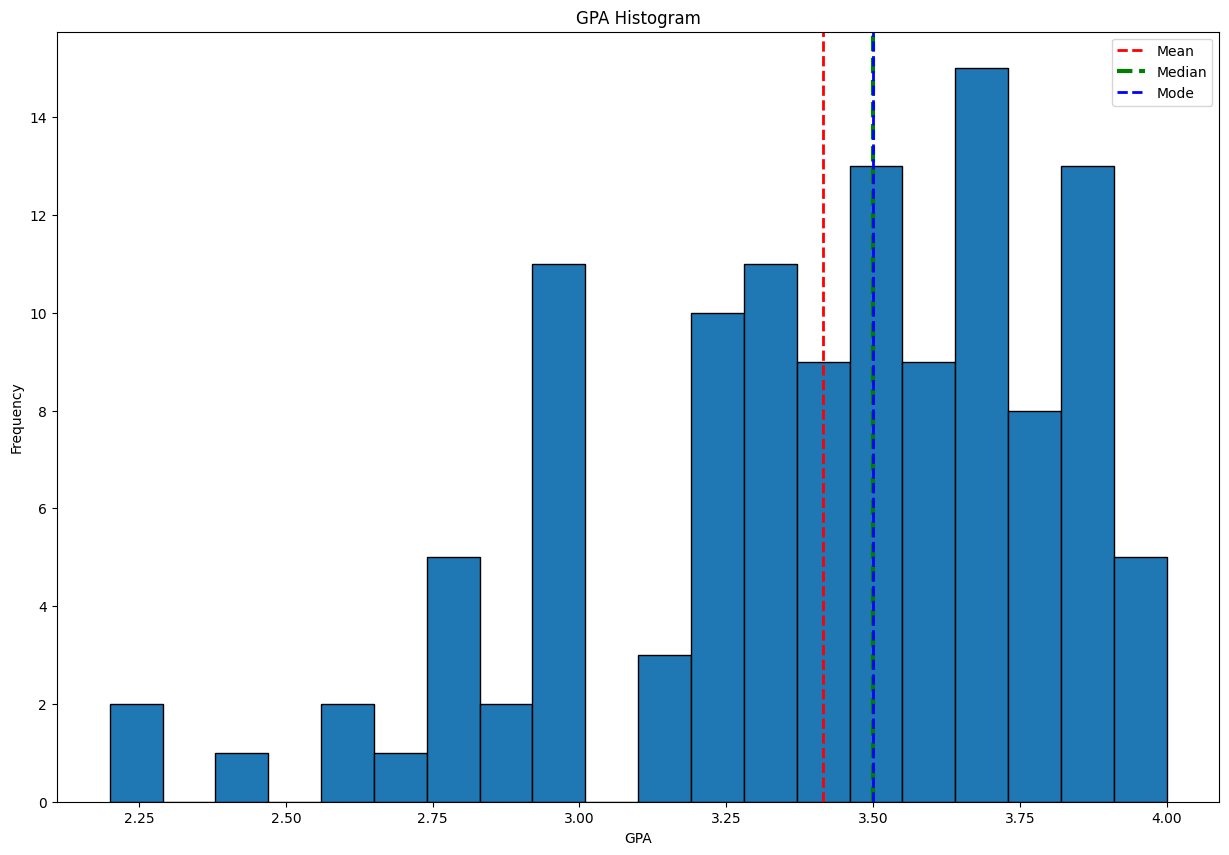

In [290]:
# Numeric - Histogram - GPA

plt.figure(figsize=(15, 10))
plt.hist(data['GPA'].dropna(), bins=20, edgecolor='black')
plt.title('GPA Histogram')
plt.xlabel('GPA')
plt.ylabel('Frequency')

plt.axvline(data['GPA'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['GPA'].median(), color='green', linestyle='dashed', linewidth=3, label='Median')
plt.axvline(data['GPA'].mode()[0], color='blue', linestyle='dashed', linewidth=2, label='Mode')
plt.legend()

plt.show()

__GPA boxplot__\
There are 3 outliers in the lower part. Overall, IQR is over 3.0 GPA

__GPA histogram__\
Mean is a bit to the right, but Median and Mode are symmetric. And by the look of the histogram (and the previous values in statistical summary, where skewness is -0.75), GPA attribute is negatively skewed. 

{'whiskers': [<matplotlib.lines.Line2D at 0x17f826891d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17f82689e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f82689fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x17fce3569d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17fce357fd0>],
 'means': []}

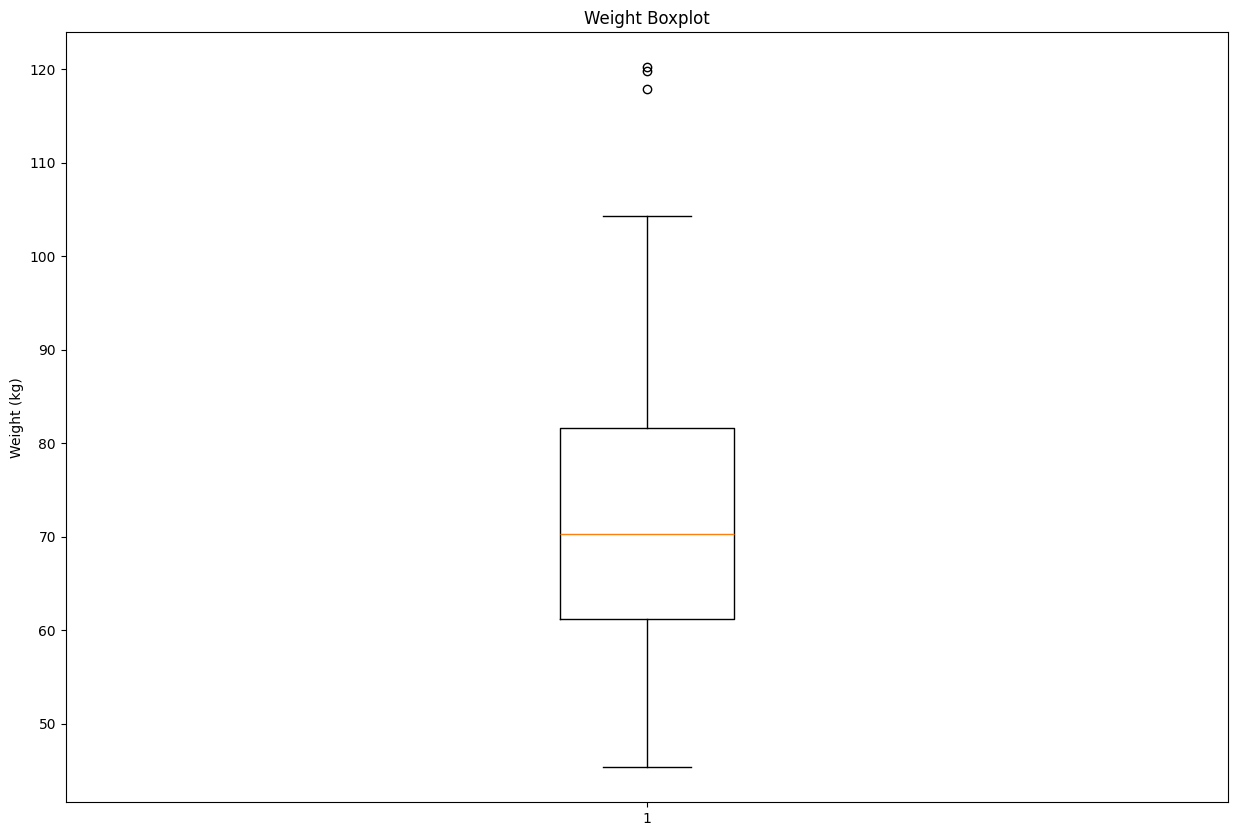

In [291]:
# Numeric - Boxplot - Weight

plt.figure(figsize=(15, 10))
plt.title('Weight Boxplot')
plt.ylabel('Weight (kg)')
plt.boxplot(data['weight'].dropna())

Also here we have some outliers, but in the upper part (overweight)./
There are 3 outliers, all around of ~120kg.

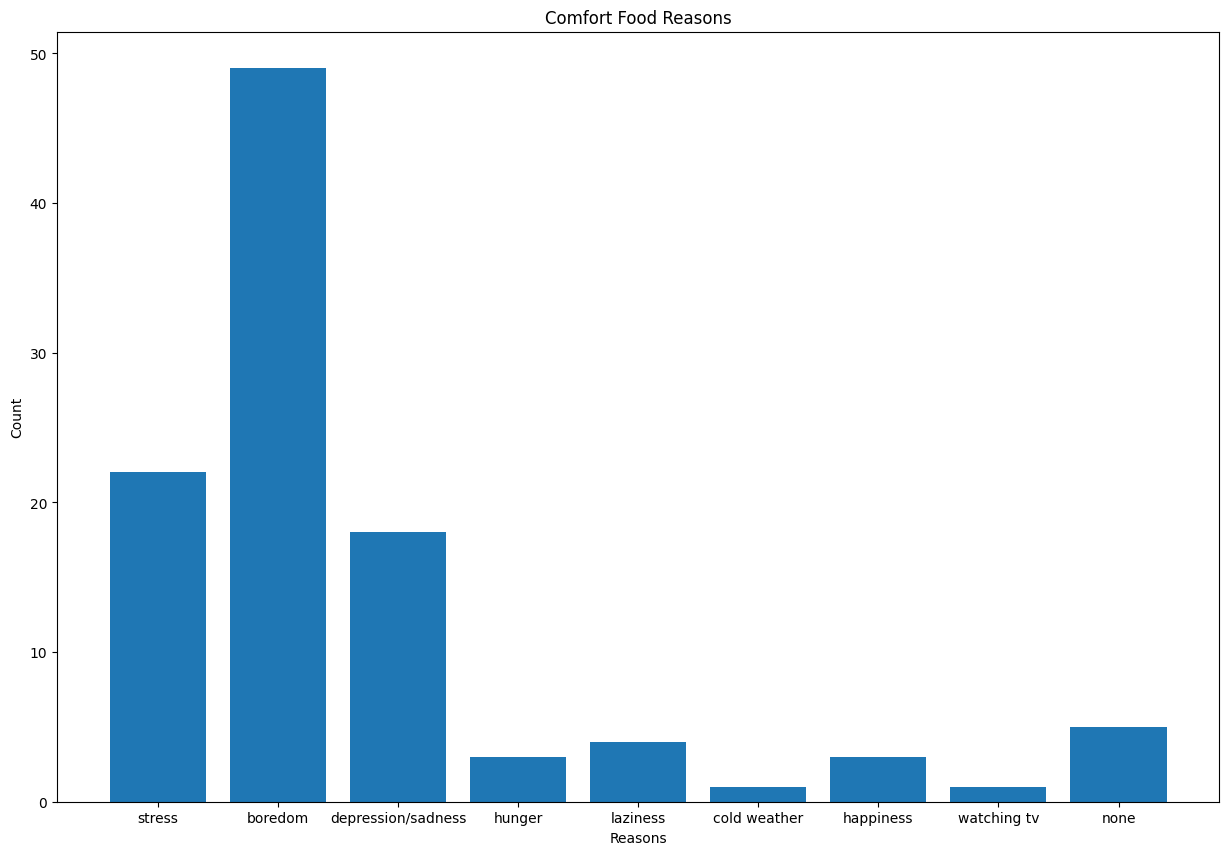

In [292]:
# Nominal - Barplot - Comfort Food Reasons (coded)

categories = ['stress', 'boredom', 'depression/sadness', 'hunger', 'laziness', 
              'cold weather', 'happiness', 'watching tv', 'none']

plt.figure(figsize=(15, 10))
plt.bar(categories, data['comfort_food_reasons_coded'].value_counts().sort_index())
plt.title('Comfort Food Reasons')
plt.xlabel('Reasons')
plt.ylabel('Count')

plt.show()

As seen in this bar plot, boredom, stress and depression/sadness are the main reasons for eating a comfort food. 

### healthy_feeling summary - ORDINAL ###
Median: 5.0
                 Count Proportion
healthy_feeling                  
8                   17      13.6%
7                   16      12.8%
5                   15      12.0%
3                   15      12.0%
4                   13      10.4%
2                   12       9.6%
6                   12       9.6%
9                   12       9.6%
1                    8       6.4%
10                   5       4.0%




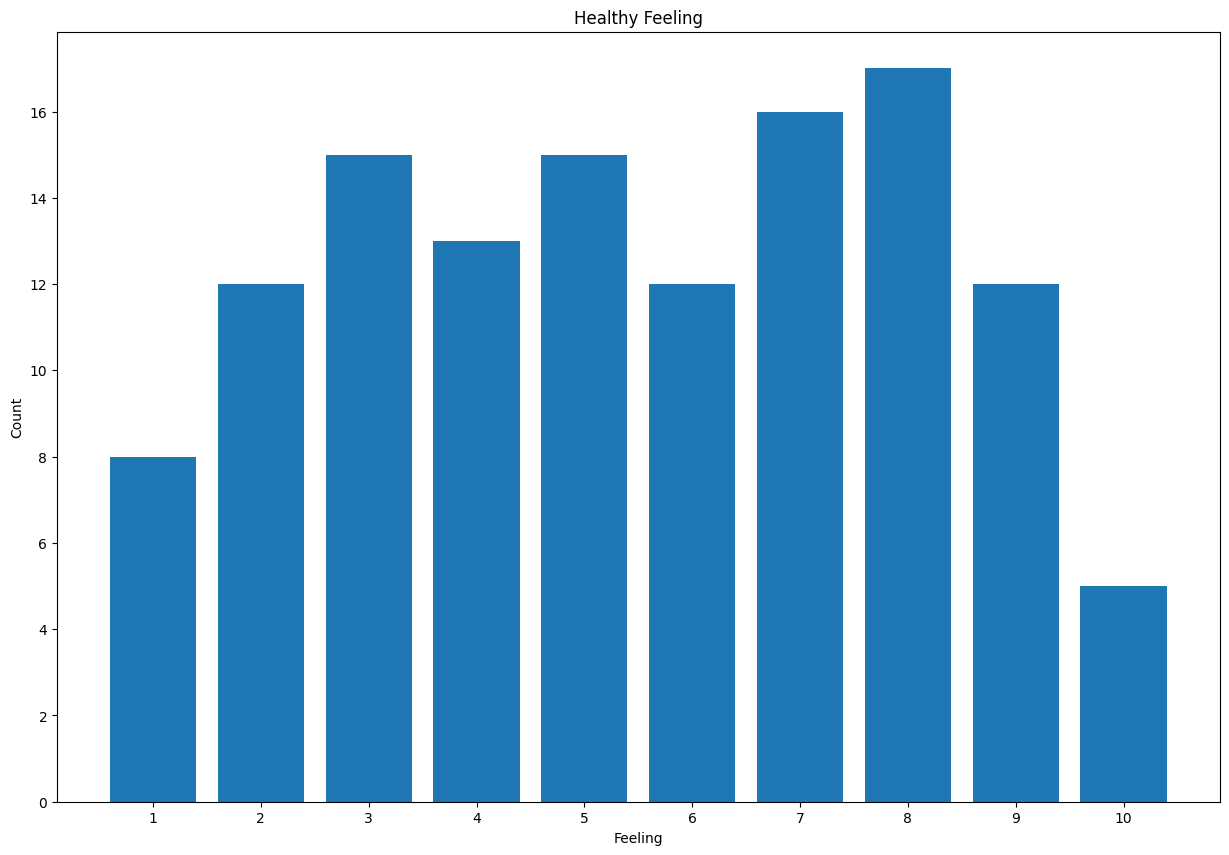

In [293]:
# Ordinal - Barplot - Healthy Feeling

plt.figure(figsize=(15, 10))
plt.bar(data['healthy_feeling'].value_counts().index, data['healthy_feeling'].value_counts())

plt.title('Healthy Feeling')
plt.xlabel('Feeling')
plt.ylabel('Count')
plt.xticks(range(1, 11))

stats_summary('healthy_feeling')

There is an almost-even dispersion of the data, numbers also confirm it. The 10, feeling perfectly healthy, is more to an extreme, being understandable why it is lower that the others. 

### Gender summary - BINARY ###
        Count Proportion
Gender                  
1          76      60.8%
2          49      39.2%




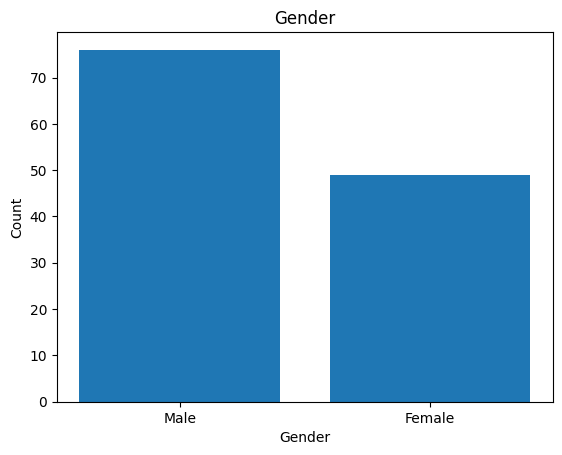

In [294]:
# Binary - Barplot - Gender

plt.bar(['Male', 'Female'], data['Gender'].value_counts())
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

binary('Gender')

Predominantly males. (76 males, 61%, and 49 females, 39%).

*** 
I am not sure if I did something wrong when I identified the numerical attributes, but the only numerical attributes I found were `GPA`(interval-scaled) and `weight`(ratio-scaled). So I will not be able to calculate correlation for 3 pairs of numerical attributes. 

Correlations will be calculated for the following pairs: 
- `GPA` and `weight` (both numeric)
- `eating_changes_coded` and `self_perception_weight`
- `cook` and `parents_cook`
- `life_rewarding` and `income`
- `fav_cuisine_coded` and `ideal_diet_coded`

PearsonRResult(statistic=0.06681536648553987, pvalue=0.4684057379558803)


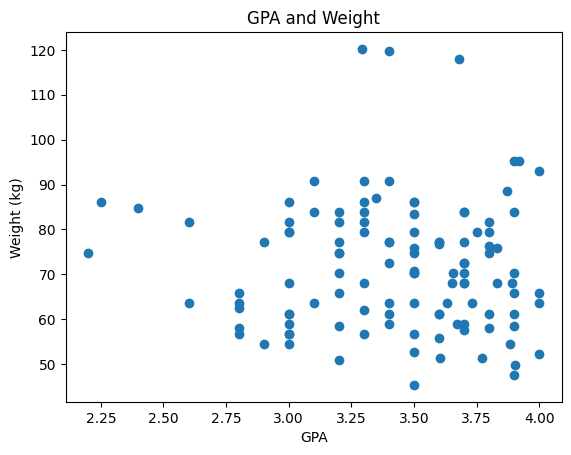

In [295]:
# GPA and weight correlation
print(sp.pearsonr(data['GPA'].dropna(), data['weight'].dropna()))

plt.scatter(data['GPA'], data['weight'])
plt.title('GPA and Weight')
plt.xlabel('GPA')
plt.ylabel('Weight (kg)')
plt.show()

The correlation coefficient si 0.06 (close to 0), so there is no correlation between GPA and weight.\
The p-value is 0.46 (>0.05), no statistically significant relationship\ 
Also the plot shows it. 

Chi-square statistic (X^2): 32.39258607581188
Critical value: 79.08194448784874
P-value: 0.9986439509805713
Degrees of freedom: 60


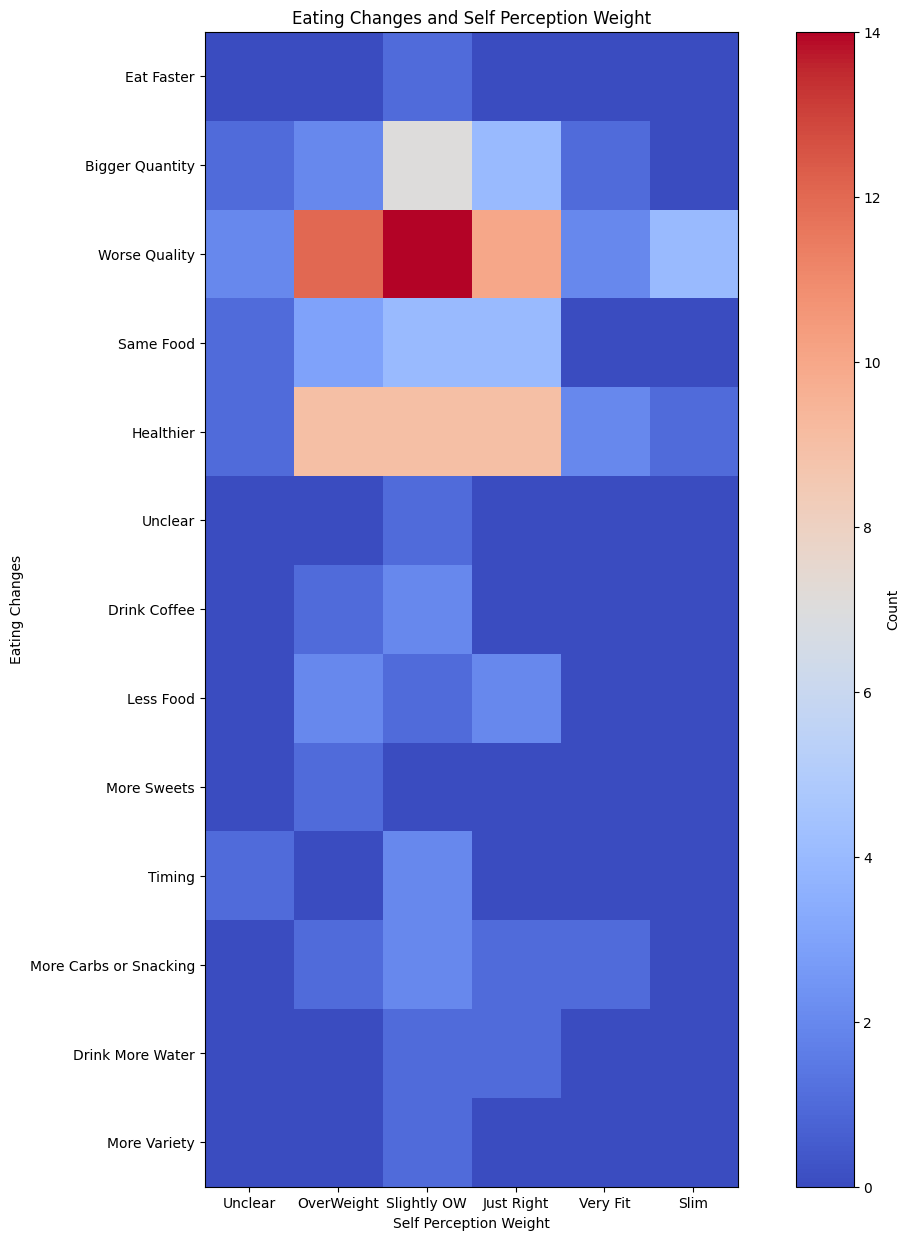

In [296]:
# eating_changes_coded and self_perception_weight correlation

contingency_table = pd.crosstab(data['eating_changes_coded1'], data['self_perception_weight'])
chi2, p_value, dof, expected = sp.chi2_contingency(contingency_table)
critical_value = sp.chi2.ppf(1 - 0.05, dof)

print("Chi-square statistic (X^2):", chi2)
print("Critical value:", critical_value) 
print("P-value:", p_value)
print("Degrees of freedom:", dof)

eating_changes_labels = [
    'Eat Faster', 'Bigger Quantity', 'Worse Quality', 'Same Food',
    'Healthier', 'Unclear', 'Drink Coffee', 'Less Food', 'More Sweets',
    'Timing', 'More Carbs or Snacking', 'Drink More Water', 'More Variety'
]

self_perception_weight_labels = [
    'Unclear', 'OverWeight', 'Slightly OW',
    'Just Right', 'Very Fit', 'Slim'
]

plt.figure(figsize=(15, 15))
plt.imshow(contingency_table, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Count')
plt.title('Eating Changes and Self Perception Weight')
plt.xlabel('Self Perception Weight')
plt.ylabel('Eating Changes')
plt.xticks(range(len(contingency_table.columns)), self_perception_weight_labels)
plt.yticks(range(len(contingency_table.index)), eating_changes_labels)
plt.show()

Chi-square statistic is smaller than critical value, and P-value is bigger than significance level (that is 0.05, the default one). It is not statistically significant. 

I hoped to see if it's a correlation between the current perception of weight and previous changes in eating. For example, the ones that see themselves as slightly fat to have a bad change of eating in the past. I was curious, if it proved true, it would confirm some insecurities of my friends. 

But at least, in the very interesting plot I made we can see that 14 Slightly Overweight people got a Worse Quality of food. This sparks me joy (because my assumptions is bad, but not that bad, not because those people have a bad eating habit)

In [297]:
# cook and parents_cook correlation

min_length = min(len(data['cook'].dropna()), len(data['parents_cook'].dropna()))
cook_trim = data['cook'].dropna()[:min_length]
parents_cook_trim = data['parents_cook'].dropna()[:min_length]

corr_coeff, p_value = sp.spearmanr(cook_trim, parents_cook_trim)
print("Spearman correlation coefficient:", corr_coeff)
print("p-value:", p_value)



Spearman correlation coefficient: 0.24881117424418478
p-value: 0.005718210471515354


Spearman coefficient is bigger than 0, that means is a weak positive correlation (0.248), but the p-value is statistically significant (0.0057 < 0.05).
They are correlated!

In [298]:
# life_rewarding and income correlation

min_length = min(len(data['life_rewarding'].dropna()), len(data['income'].dropna()))
life_trim = data['life_rewarding'].dropna()[:min_length]
income_trim = data['income'].dropna()[:min_length]

corr_coeff, p_value = sp.spearmanr(life_trim, income_trim) 
print("Spearman correlation coefficient:", corr_coeff)
print("p-value:", p_value)



Spearman correlation coefficient: -0.11034885523472963
p-value: 0.22243533950802016


Spearman coefficient is slightly negative, but too close to 0, and p-value is bigger than 0.05. They are not correlated

Chi-square statistic (X^2): 58.356502044160656
Critical value: 74.46832415930936
P-value: 0.38879931975792276
Degrees of freedom: 56


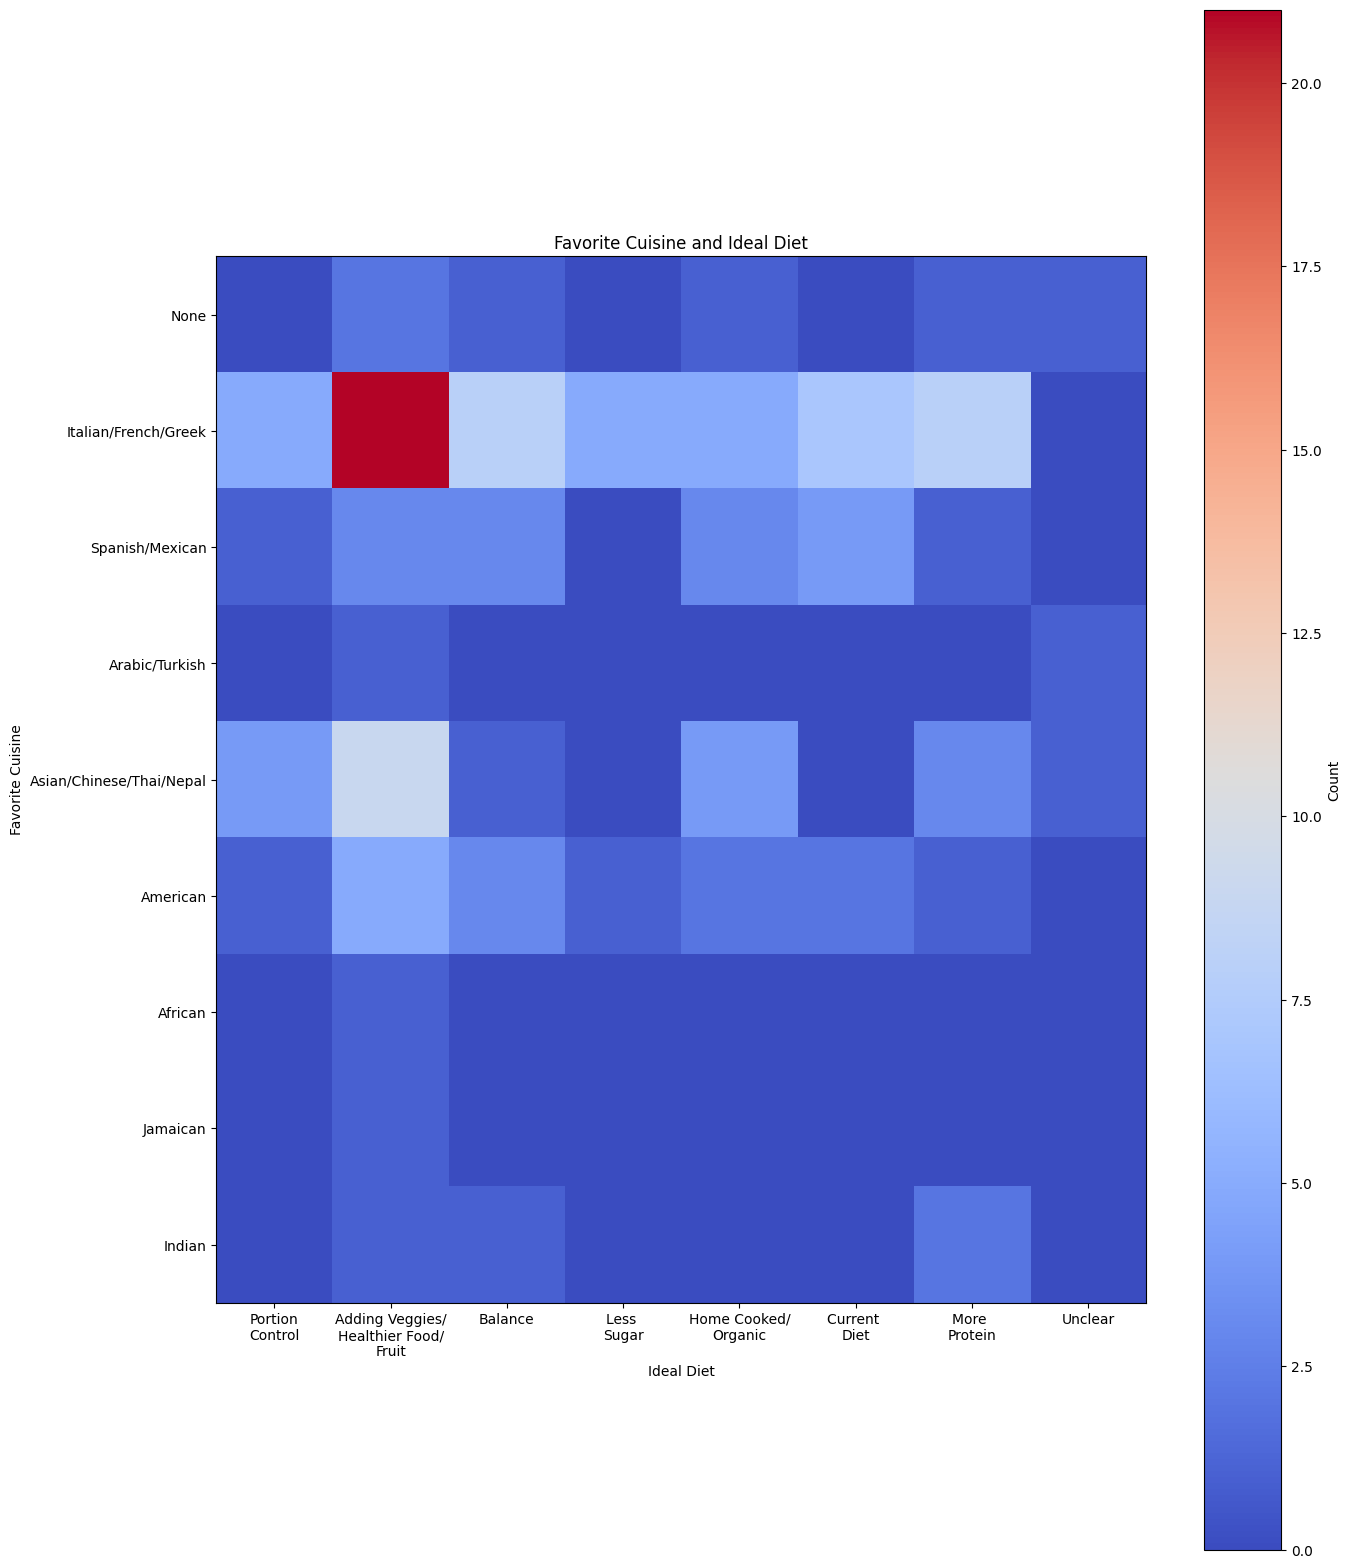

In [299]:
# fav_cuisine_coded and ideal_diet_coded correlation

contingency_table = pd.crosstab(data['fav_cuisine_coded'], data['ideal_diet_coded'])
chi2, p_value, dof, expected = sp.chi2_contingency(contingency_table)
critical_value = sp.chi2.ppf(1 - 0.05, dof)

print("Chi-square statistic (X^2):", chi2)
print("Critical value:", critical_value) 
print("P-value:", p_value)
print("Degrees of freedom:", dof)

fav_cuisine_labels = [
    'None', 'Italian/French/Greek', 'Spanish/Mexican',
    'Arabic/Turkish', 'Asian/Chinese/Thai/Nepal', 'American',
    'African', 'Jamaican', 'Indian'
]

ideal_diet_labels = [
    'Portion\nControl', 'Adding Veggies/\nHealthier Food/\nFruit', 'Balance',
    'Less \nSugar', 'Home Cooked/\nOrganic', 'Current \nDiet',
    'More \nProtein', 'Unclear'
]

plt.figure(figsize=(15, 20))
plt.imshow(contingency_table, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Count')
plt.title('Favorite Cuisine and Ideal Diet')
plt.xlabel('Ideal Diet')
plt.ylabel('Favorite Cuisine')
plt.xticks(range(len(contingency_table.columns)), ideal_diet_labels)
plt.yticks(range(len(contingency_table.index)), fav_cuisine_labels)
plt.show()

Chi2 coefficient is smaller than critical value, so we reject the hypothesis, there is no correlation. But at least we can see some people associate eating more vegies/fruits with mediteranean cuisine. 

***
# Personal Notes
1. The `sports` attribute is noted in the docx that it would have a value '99' for no answer. It doesn't, so I consider it binary. Even if I didn't use it
2. I had a depressive episode and started very late (6 april). It is far from perfect but I tried my best!! But I would appreciate a feedback on what you like and especially on what can be improved
3. I was confused on how to categorise the binary asymmetrical (i didn't see any). 
4. Some attributes could be ordinal, but they had a value that 'broke' the ranking/order. These are `self_perception_weight` (value: i dont think myself in these terms), `eating_changes_coded` (value: unclear), `calories_day` (value: i don't know how many)
5. I did not remove the missing values because I saw you gave us the cleaning in the next assignment and I just played around with .dropna()
6. After I understood the data, I really enjoyed to play around with it. 
